# Step 1: The Hypotheses

## Hypothesis 1: GDP Per Capita vs Suicide

There's this endless debate between people who are advocates of the "money brings happiness" philosophy and their opponents, the "money's just a number" proponents. Let's put these two statements to the test. If it is true that money brings happiness, then as GDP per capita goes up, the number of suicides will go down. We can randomly sample the population and see what the trend is in our sample.

In order to do this, we need to divide our population into two sectors: the high GDP per capita sector and the low GDP per capita sector. From these two we can proceed to randomly sample the number of suicides in each group. 

The above is my reasoning thus far. So, let me lay out my alternate and null hypotheses as follows:

Alternate Hypothesis: Citizens from lower gdp per capita group are more prone to suicide than those in the higher gdp per capita group on average. $\mu_l$ - $\mu_{h}$ > 0  (exciting, new claim!)

Null Hypothesis: The suicide rates between the two groups is the same on average. $\mu_l$ - $\mu_h$ = 0 (no difference bro!)

## Hypothesis 2: Sex vs Suicide 

I am curious to know - are men or women more likely to commit suicide? It would be interesting indeed if we found that say men committed suicide on average more than women. If so, I wonder what the cause of that would be?

I will construct the following 1-sided hypotheses to test this:

Alternate Hypothesis: The average suicide rate of men higher than that in women. $$\mu_{men}-\mu_{women} > 0$$

Null Hypothesis: There is no difference between the number of men and number of women who commit suicide. $$\mu_{men}-\mu_{women} = 0$$

## Hypothesis 3: Generation vs Suicide 

Did past generations have more suicides compared to current generations? I've been hearing that suicide rates have been going up. If this is true then the past generations would have lower suicide rates than current generations. So, based on this premise, I'm going to construct my hypotheses like this:

Alternate Hypothesis: The average suicide rate among current generations (Gen X, Millenials, Gen Z) is more than that in previous generations (Silent, G.I., Boomers) (whoa! Cool!). $\mu_{new} - \mu_{old} > 0$

Null Hypothesis: The average suicide rate among current generations is the same as suicide rates in previous generations (no difference bro!). $\mu_{new} - \mu_{old} = 0$

## Hypothesis 4: Age vs Suicide 

Does age affect suicide? Do younger people commit suicide more than older folks? Or is it the other way around? 

The data is already divided by age group, so we can put forth the below hypotheses:

Alternate Hypothesis: The suicide rates among the various age groups are different (new! exciting!).

Null Hypothesis: The suicide rates among the various age groups is the same (no difference bro!).

## Hypothesis 5: Time vs Suicide 

As we go through time, is suicide increasing? Or is it decreasing? I've heard that suicide rates have been increasing. Let's put this to the test.

Alternate Hypothesis: The suicide rates in past years (1985 - 2000) is greater than the suicide rates in recent years (2001 - 2016)

Null Hypothesis: The suicide rates in past years (1985 - 2000) is the same as the suicide rates in recent years (2001 - 2016)

# Step 2: Retrieving the Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chi2, chisquare
from IPython.core.debugger import set_trace

In [2]:
#Read from the master.csv file and put into a dataframe
suicides = pd.read_csv('master.csv',sep=',',header=0,names=['country','yr','sex','age','suicides_no',
                                                            'population','suicides_100k','country_yr',
                                                            'HDI_yr','gdp_yr','gdp_pc','gen'])

In [3]:
#Check the first 5 entries in dataframe
suicides.head()

,country,yr,sex,age,suicides_no,population,suicides_100k,country_yr,HDI_yr,gdp_yr,gdp_pc,gen
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country          27820 non-null object
yr               27820 non-null int64
sex              27820 non-null object
age              27820 non-null object
suicides_no      27820 non-null int64
population       27820 non-null int64
suicides_100k    27820 non-null float64
country_yr       27820 non-null object
HDI_yr           8364 non-null float64
gdp_yr           27820 non-null object
gdp_pc           27820 non-null int64
gen              27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
suicides.shape

(27820, 12)

# Step 3: Testing the Hypotheses 

## Hypothesis 1: GDP Per Capita versus Suicide 

Method 1: Take the max GDP per capita, take the min GDP per capita and compute (max - min) / 2. This will give us a "naive" boundary between the two groups for now. 

In [6]:
suicides.gdp_pc

0         796
1         796
2         796
3         796
4         796
5         796
6         796
7         796
8         796
9         796
10        796
11        796
12        769
13        769
14        769
15        769
16        769
17        769
18        769
19        769
20        769
21        769
22        769
23        769
24        833
25        833
26        833
27        833
28        833
29        833
         ... 
27790    1964
27791    1964
27792    1964
27793    1964
27794    1964
27795    1964
27796    2150
27797    2150
27798    2150
27799    2150
27800    2150
27801    2150
27802    2150
27803    2150
27804    2150
27805    2150
27806    2150
27807    2150
27808    2309
27809    2309
27810    2309
27811    2309
27812    2309
27813    2309
27814    2309
27815    2309
27816    2309
27817    2309
27818    2309
27819    2309
Name: gdp_pc, Length: 27820, dtype: int64

In [7]:
#Let's do a groupby on gdp per capita and see how many total suicides there are
gdp_pc_grouped = suicides.groupby('gdp_pc')[['suicides_100k']].sum()

In [8]:
gdp_pc_grouped.head()

,suicides_100k
gdp_pc,
251,18.00
291,191.44
313,182.63
345,193.30
357,51.05


In [9]:
gdp_pc_grouped = gdp_pc_grouped.reset_index()

In [10]:
gdp_pc_grouped.head()

,gdp_pc,suicides_100k
0,251,18.00
1,291,191.44
2,313,182.63
3,345,193.30
4,357,51.05


In [11]:
gdp_mean = gdp_pc_grouped.mean()[0]

In [12]:
gdp_mean

17283.135691894313

In [13]:
#We engineer a new binary column called "gdp_pc_hilo" which shows 1 = high gdp, 0 = low gdp
gdp_pc_grouped['gdp_pc_hilo'] = gdp_pc_grouped.gdp_pc.apply(lambda x : 0 if x < gdp_mean else 1)

In [14]:
#Get the high group (treatment) into a separate dataframe
high_group = gdp_pc_grouped[gdp_pc_grouped['gdp_pc_hilo'] == 1]
high_group.head()

,gdp_pc,suicides_100k,gdp_pc_hilo
1439,17299,139.08,1
1440,17349,99.19,1
1441,17387,143.68,1
1442,17395,0.00,1
1443,17415,405.88,1


In [15]:
#Get the low group (treatment) into a separate dataframe
low_group = gdp_pc_grouped[gdp_pc_grouped['gdp_pc_hilo'] == 0]
low_group.head()

,gdp_pc,suicides_100k,gdp_pc_hilo
0,251,18.00,0
1,291,191.44,0
2,313,182.63,0
3,345,193.30,0
4,357,51.05,0


In [16]:
low_group.gdp_pc_hilo.count()

1439

In [17]:
high_group.gdp_pc_hilo.count()

794

Before we move along, we need to pay attention to two main statistical criteria. We would like to use the normal model (bell curve) to estimate the population proportions in the high and low groups. 

1. Independence Criterion - We need our sample size to be lower than 10% of the total population to ensure that the observations are sufficiently independent. On top of this, we also need our sample size to be big enough. If the population is not heavily skewed, then we can get away with a sample size of 30 or more in each group. However, if we see the suicide_100k variable, it is heavily skewed. In this case, we need to fulfill a sample size of greater than 100.

2. Success-Failure Criterion- We need to ensure that the total number of successes and total number of failures in each group (sample size * proportion) is greater than 10. 



Once the above criteria are satisfied, we can use the normal model to estimate our population proportions.

In [18]:
#First, let's start with N = 200 random samples from both groups. This ensures we are far away from the 
#100 minimum and so we can ensure independence to some extent.
sample_size = 1000
population = suicides.shape[0]

high = np.random.choice(high_group.gdp_pc.values,sample_size)
low = np.random.choice(low_group.gdp_pc.values,sample_size)

We have taken a sample size of 1000 for both groups. The total population size is 27820 and 10% of this is 2782. So we are well within our 10% limit and our sample size is greater than 100. So we satisfy the Independence criterion.

In [19]:
high_group.set_index('gdp_pc',inplace=True)
high_group.head()

,suicides_100k,gdp_pc_hilo
gdp_pc,,
17299,139.08,1
17349,99.19,1
17387,143.68,1
17395,0.00,1
17415,405.88,1


In [20]:
low_group.set_index('gdp_pc',inplace=True)
low_group.head()

,suicides_100k,gdp_pc_hilo
gdp_pc,,
251,18.00,0
291,191.44,0
313,182.63,0
345,193.30,0
357,51.05,0


In [21]:
suicides_high_sample = high_group['suicides_100k'].loc[high]
suicides_high_sample.size

1000

In [22]:
suicides_low_sample = low_group['suicides_100k'].loc[low]
suicides_low_sample.size

1000

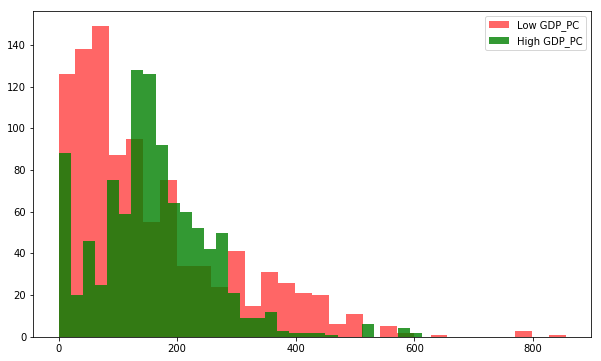

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist(suicides_low_sample.values, bins=30, histtype='bar', color='red', alpha=0.6, label='Low GDP_PC')
ax.hist(suicides_high_sample.values, bins=30, histtype='bar', color='green', alpha=0.8, label='High GDP_PC')
ax.legend()
plt.show();

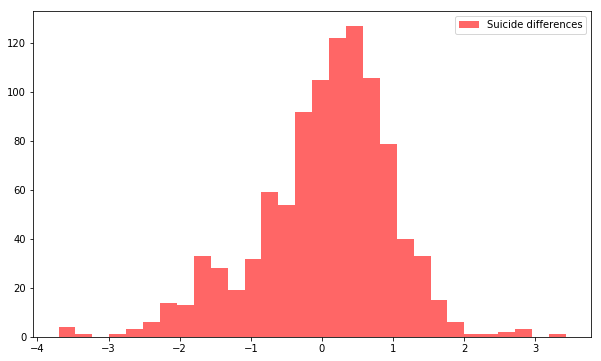

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist((suicides_high_sample.values - suicides_low_sample.values)/175, bins=30, histtype='bar', color='red', 
        alpha=0.6, label='Suicide differences')
ax.legend()
plt.show();

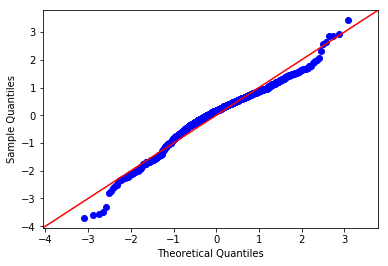

In [25]:
qqplot((suicides_high_sample.values - suicides_low_sample.values)/175,line='45');

In [26]:
#Let's find the z-statistic and p-value for the one-sided hypothesis test
stat = ztest(suicides_low_sample.values, suicides_high_sample.values, 0, 'larger')

In [27]:
print("Z-statistic = %.2f" % stat[0])
print("P-value = ", stat[1])

Z-statistic = -1.29
P-value =  0.9017849805588711


We see that our p-value is generally greater than significance level alpha = 0.05. So, we fail to reject the null hypothesis. This means that we do not reject the notion that there is no difference between the low gdp group and high gdp group. There is no significant evidence to suggest that the average suicide rate in the low gdp group is greater than the average suicide rate in the low gdp group.

## Hypothesis 2: Sex versus Suicide 

In [28]:
sexes = suicides[['sex','suicides_100k']]

In [29]:
print(sexes.size)
sexes.head()

55640


,sex,suicides_100k
0,male,6.71
1,male,5.19
2,female,4.83
3,male,4.59
4,male,3.28


In [30]:
males = sexes[sexes.sex == 'male']
females = sexes[sexes.sex == 'female']

In [31]:
print(males.size)
males.head()

27820


,sex,suicides_100k
0,male,6.71
1,male,5.19
3,male,4.59
4,male,3.28
8,male,0.73


In [32]:
print(females.size)
females.head()

27820


,sex,suicides_100k
2,female,4.83
5,female,2.81
6,female,2.15
7,female,1.56
9,female,0.00


In [33]:
#Sample size = 200 which is less than 10% of the population sizes (27,820)
#This means samples will be independent. This will also account for skew in the population distribution.
sample_size = 200
male_samp = males.sample(sample_size)
female_samp = females.sample(sample_size)

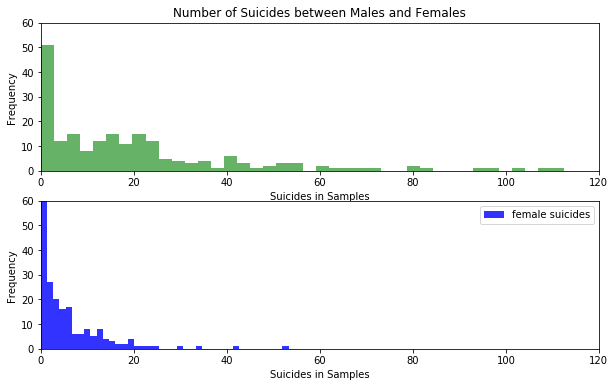

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6))
ax1.hist(male_samp['suicides_100k'], bins=40, histtype='bar',color='green',alpha=0.6, label='male suicides')
ax2.hist(female_samp['suicides_100k'], bins=40, histtype='bar',color='blue',alpha=0.8, label='female suicides')
ax1.set(xlabel='Suicides in Samples', ylabel='Frequency', 
       title='Number of Suicides between Males and Females', xlim=[0,120], ylim=[0,60])
ax2.set(xlabel='Suicides in Samples', ylabel='Frequency', xlim=[0,120], ylim=[0,60])
plt.legend()
plt.show();

In [35]:
sdiff = male_samp['suicides_100k'].values - female_samp['suicides_100k'].values
sdiff

array([ 3.0000e-02,  2.6150e+01,  1.0050e+01,  1.9600e+01,  3.0580e+01,
        6.4200e+00,  1.2560e+01,  6.6300e+00,  2.7260e+01,  1.8850e+01,
        3.1340e+01,  5.0300e+00,  1.1020e+01,  6.3700e+00, -9.7500e+00,
       -1.3500e+00,  1.1000e+00,  3.2390e+01, -8.8600e+00,  1.7970e+01,
        4.4850e+01, -4.8400e+00,  1.2790e+01,  1.3250e+01,  3.3870e+01,
        3.4610e+01,  4.0430e+01,  1.3630e+01,  1.6800e+01, -3.2700e+00,
       -4.6800e+00,  9.6600e+00,  1.1620e+01,  5.8540e+01,  2.0260e+01,
       -7.9000e+00,  1.6380e+01, -2.9740e+01,  8.3800e+00,  2.1110e+01,
       -1.9900e+00,  1.8380e+01,  3.7000e-01, -5.3300e+01,  4.6000e+00,
        1.3900e+01,  1.8240e+01,  1.6560e+01,  8.4500e+00,  3.1900e+01,
       -2.8100e+00, -1.3570e+01, -9.8300e+00,  0.0000e+00,  1.1256e+02,
       -2.5600e+00, -4.0400e+00,  4.0300e+00, -4.4400e+00, -3.0200e+00,
        4.6510e+01, -4.5800e+00,  4.3150e+01,  1.1830e+01,  1.5720e+01,
        5.0000e-02,  3.1020e+01, -3.4000e-01, -1.8240e+01,  2.01

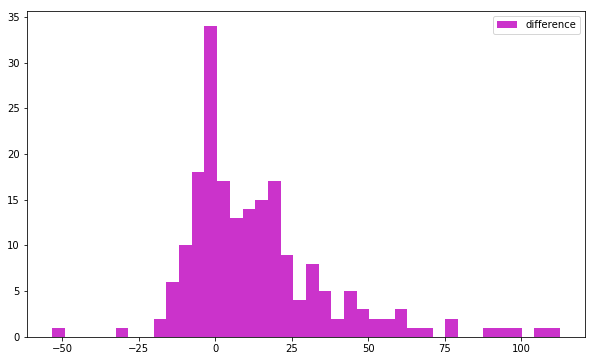

In [36]:
plt.figure(figsize=(10,6))
plt.hist(sdiff, bins=40, histtype='bar', color='m', label='difference', alpha=0.8)
plt.legend()
plt.show();

In [37]:
zstat, pvalue = ztest(x1=sdiff, value=0, alternative='larger')

In [38]:
print('Z-statistic = %.2f' % zstat)
print('p-value = ', pvalue)

Z-statistic = 8.24
p-value =  8.3305497652395e-17


Since our p-value is significantly lower than our significance level of 0.05, we can reject the null hypothesis which says there's no difference in men and women average suicide rates. There is considerable evidence that men commit suicide more than women on average.

# Hypothesis 3: Generations vs Suicide

In [39]:
generations = suicides[['suicides_100k','gen']]
generations.head()

,suicides_100k,gen
0,6.71,Generation X
1,5.19,Silent
2,4.83,Generation X
3,4.59,G.I. Generation
4,3.28,Boomers


In [40]:
generations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 2 columns):
suicides_100k    27820 non-null float64
gen              27820 non-null object
dtypes: float64(1), object(1)
memory usage: 434.8+ KB


In [41]:
old = generations[(generations['gen'] == 'Silent') | (generations['gen'] == 'Boomers') \
                     | (generations['gen'] == 'G.I. Generation')]
old.head()

,suicides_100k,gen
1,5.19,Silent
3,4.59,G.I. Generation
4,3.28,Boomers
5,2.81,G.I. Generation
6,2.15,Silent


In [42]:
old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14098 entries, 1 to 27819
Data columns (total 2 columns):
suicides_100k    14098 non-null float64
gen              14098 non-null object
dtypes: float64(1), object(1)
memory usage: 330.4+ KB


In [43]:
new = generations[(generations['gen'] == 'Generation Z') | (generations['gen'] == 'Generation X') \
                     | (generations['gen'] == 'Millenials')]
new.head()

,suicides_100k,gen
0,6.71,Generation X
2,4.83,Generation X
9,0.00,Generation X
11,0.00,Generation X
13,5.33,Generation X


In [44]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13722 entries, 0 to 27818
Data columns (total 2 columns):
suicides_100k    13722 non-null float64
gen              13722 non-null object
dtypes: float64(1), object(1)
memory usage: 321.6+ KB


In [45]:
#Condition 1: Sample size should be less than 10% of the population size to ensure independence. 
#(new: n < 1372.2, old: n < 1409.8)
#Condition 2: Sample size should be greater than 100 to account for skew in population/sample. (n > 100)
#Conclusion: Therefore 100 < n < 1372.2 or 1409.8. We will go with n = 200 since this is practical 
#and sufficiently far from our lower cutoff of 100.
old_samp_size = 200
new_samp_size = 200
old_samp = generations.sample(old_samp_size)
new_samp = generations.sample(new_samp_size)

In [46]:
old_samp.head()

,suicides_100k,gen
8540,8.12,Silent
25923,0.37,Millenials
8294,23.24,Generation X
8044,9.67,Millenials
23148,24.94,Generation X


In [47]:
new_samp.head()

,suicides_100k,gen
1546,30.96,Generation X
5215,0.65,Generation Z
1751,24.18,Generation X
17373,6.44,Silent
16993,0.00,Silent


In [48]:
old_samp.info(), new_samp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 8540 to 24838
Data columns (total 2 columns):
suicides_100k    200 non-null float64
gen              200 non-null object
dtypes: float64(1), object(1)
memory usage: 4.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1546 to 14319
Data columns (total 2 columns):
suicides_100k    200 non-null float64
gen              200 non-null object
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


(None, None)

In [49]:
diff = old_samp['suicides_100k'].values - new_samp['suicides_100k'].values
diff

array([-2.2840e+01, -2.8000e-01, -9.4000e-01,  3.2300e+00,  2.4940e+01,
        2.6600e+00,  1.4580e+01, -3.1930e+01, -1.6000e+00, -7.1000e-01,
        4.9170e+01, -3.2660e+01,  1.5850e+01,  5.5100e+00,  5.6700e+00,
        7.9400e+00, -6.6500e+00, -2.1610e+01, -4.9300e+00, -1.4200e+00,
       -1.4600e+01, -1.9000e-01,  4.1700e+00, -8.0000e+00,  6.6000e-01,
        2.8400e+01, -9.6000e+00, -5.4000e+00, -3.6000e+00,  1.0090e+01,
       -1.9750e+01,  3.9910e+01,  1.0800e+01,  7.3900e+00, -5.8800e+00,
       -3.9300e+00,  2.3700e+00, -4.8600e+00, -1.1780e+01, -1.6980e+01,
        1.6170e+01, -7.7000e-01,  9.6200e+00,  1.2930e+01,  6.0560e+01,
       -6.2100e+00,  8.5230e+01, -4.8400e+00,  2.9500e+00,  1.3000e-01,
        1.2700e+00, -2.1800e+00, -1.3100e+01,  0.0000e+00, -9.2200e+00,
        1.5310e+01, -1.5300e+00, -3.5410e+01, -4.8800e+00,  3.0970e+01,
        2.2770e+01,  0.0000e+00,  0.0000e+00,  3.2290e+01, -1.5870e+01,
        1.4320e+01,  4.7810e+01, -3.5800e+00,  4.2910e+01,  2.41

In [50]:
diff.mean()

2.44825

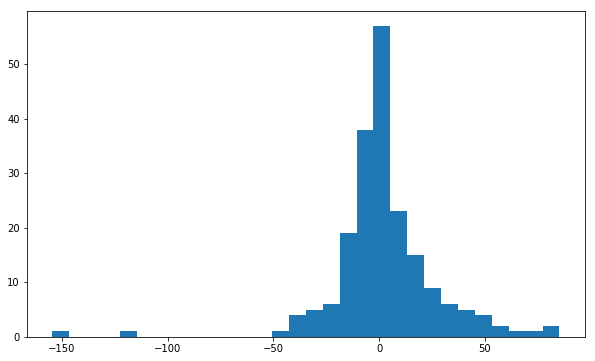

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist(diff,bins=30,histtype='bar',
        label='gen suicides')
plt.show();

In [52]:
ztest = ztest(x1=old_samp['suicides_100k'].values,x2=new_samp['suicides_100k'].values,value=0,
              alternative='larger')

In [53]:
zstat, pvalue = ztest
print('Z-statistic = %.2f' % zstat)
print('p-value = %.4f' % pvalue)

Z-statistic = 1.37
p-value = 0.0849


We see that our p-value is greater than 0.05 which means we fail to reject the null hypothesis in favor of the alternative hypothesis. We fail to find great evidence that the average suicide rate amongst younger people is greater than that in older generations. 